<a href="https://colab.research.google.com/github/duybluemind1988/project_py/blob/main/Churn/Churn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get data

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

# 2. Data analysis

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
print(X_train.shape)
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_train = X_train.dropna()
print(X_train.shape) # remove 7 values

(4507, 20)
(4500, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(X_test.shape)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
X_test = X_test.dropna()
print(X_test.shape) # remove 7 values

(1409, 20)
(1407, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Sweetvis

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(X_train)
my_report.show_html("analyze.html",open_browser=False) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
import IPython
IPython.display.HTML("analyze.html")

In [ ]:
compare_report = sv.compare([X_train,"train"],[X_test,"test"])
compare_report.show_html("compare.html",open_browser=False) 

In [ ]:
IPython.display.HTML("compare.html")

## Autovis

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(path)

## Dtale

In [ ]:
#!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(X_train)

https://ddzhzwx83oe-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/7

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Model normal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,cross_validate
#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score
from sklearn.metrics import make_scorer

# explain
import shap

In [18]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Convert to ordinal encoder or one hot encoder

In [22]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [23]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_val=X_val.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert total charge object to numeric
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_val['TotalCharges'] = X_val['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)
X_test=pd.get_dummies(X_test)

# encoder label value:
le = preprocessing.LabelEncoder()
le.fit(y_train) 
y_train=le.transform(y_train)
y_val=le.transform(y_val)
y_test=le.transform(y_test)

In [27]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

### Light gbm

#### Base model with explaination

In [31]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=LGBMClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_probs=model.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y_test,y_pred))
print('f1 macro score:',metrics.f1_score(y_test,y_pred,average="macro")) # good for imbalance dataset
print('precision macro score:',metrics.precision_score(y_test,y_pred,average="macro"))
print('recall macro score:',metrics.recall_score(y_test,y_pred,average="macro"))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:,1])
print("AUC:",metrics.auc(fpr, tpr))
print("MCC:",metrics.matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[904 131]
 [175 199]]
Balanced Accuracy score: 0.7027577565940737
f1 macro score: 0.7102958093231272
precision macro score: 0.7204215463251608
recall macro score: 0.7027577565940737
AUC: 0.8389082642279573
MCC: 0.42281049295345685
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.60      0.53      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


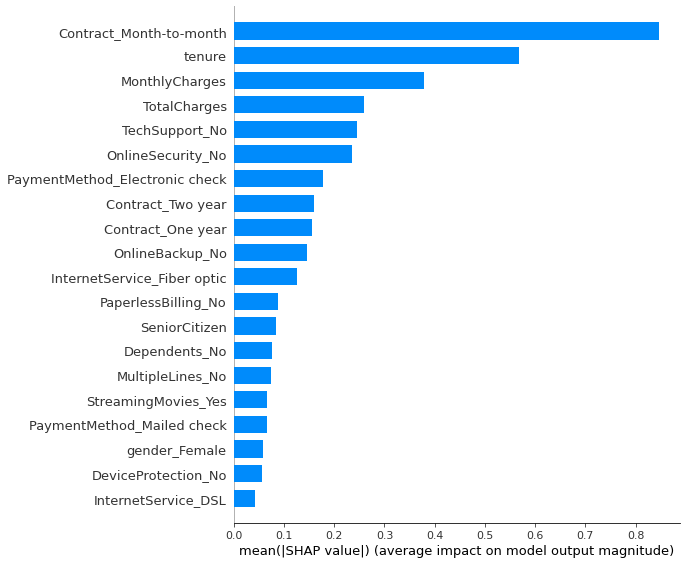

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

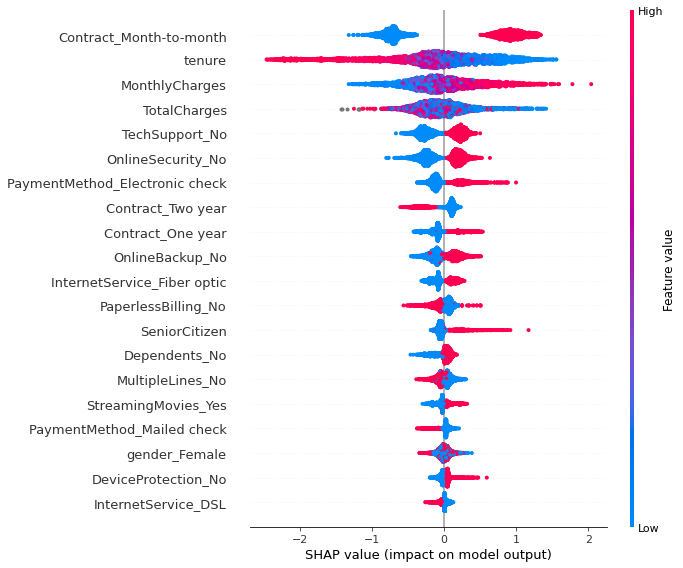

In [9]:
shap.summary_plot(shap_values[1], X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


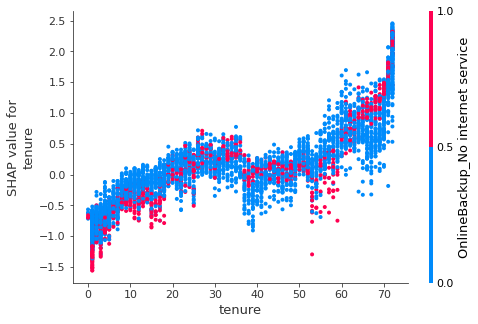

In [ ]:
shap.dependence_plot(1, shap_values[0], X_train)

#### Grid search

In [ ]:
'''
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}
'''

"\n# Hyperparameter grid\nparam_grid = {\n    'boosting_type': ['gbdt', 'goss', 'dart'],\n    'num_leaves': list(range(20, 150)),\n    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),\n    'subsample_for_bin': list(range(20000, 300000, 20000)),\n    'min_child_samples': list(range(20, 500, 5)),\n    'reg_alpha': list(np.linspace(0, 1)),\n    'reg_lambda': list(np.linspace(0, 1)),\n    'colsample_bytree': list(np.linspace(0.6, 1, 10)),\n    'subsample': list(np.linspace(0.5, 1, 100)),\n    'is_unbalance': [True, False]\n}\n"

In [32]:
parameters = {
    'max_depth': [2,5], #range (2, 10, 1),
    'n_estimators': [100,500], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = LGBMClassifier(
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [33]:
grid_search = model_selection.GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = scoring,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.5s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:   15.5s finished


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


GridSearchCV(cv=5, estimator=LGBMClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 5], 'n_estimators': [100, 500]},
             scoring='roc_auc', verbose=True)

<AxesSubplot:ylabel='params'>

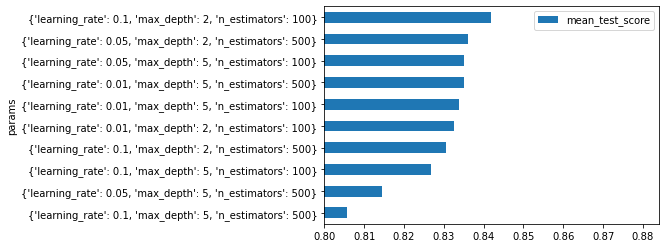

In [34]:
results = pd.DataFrame(grid_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [35]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=grid_search.best_estimator_
y_pred=model.predict(X_test)
y_pred_probs=model.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y_test,y_pred))
print('f1 macro score:',metrics.f1_score(y_test,y_pred,average="macro")) # good for imbalance dataset
print('precision macro score:',metrics.precision_score(y_test,y_pred,average="macro"))
print('recall macro score:',metrics.recall_score(y_test,y_pred,average="macro"))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:,1])
print("AUC:",metrics.auc(fpr, tpr))
print("MCC:",metrics.matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[938  97]
 [185 189]]
Balanced Accuracy score: 0.7058138934098013
f1 macro score: 0.7210253601819867
precision macro score: 0.7480509250322251
recall macro score: 0.7058138934098013
AUC: 0.846230850706554
MCC: 0.45189523850018604
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



#### Random search

In [ ]:
from scipy.stats import uniform
uniform(loc=0, scale=4)

In [ ]:
 #list(range(1,51))
np.linspace(2,10,3)
np.linspace(100,1000,5)

array([ 100.,  325.,  550.,  775., 1000.])

In [36]:
parameters = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1000], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = LGBMClassifier(
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [37]:
random_search = model_selection.RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = scoring,
    n_iter=20, #default 10: number of parameter settings that are samples.
    n_jobs = 10,
    cv = 5,
    verbose=True
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.0s


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   27.1s finished


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(nthread=4, seed=42),
                   n_iter=20, n_jobs=10,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 500, 1000]},
                   scoring='roc_auc', verbose=True)

<AxesSubplot:ylabel='params'>

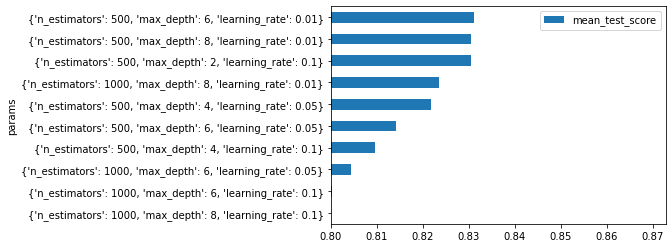

In [ ]:
results = pd.DataFrame(random_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [39]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=random_search.best_estimator_
y_pred=model.predict(X_test)
y_pred_probs=model.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y_test,y_pred))
print('f1 macro score:',metrics.f1_score(y_test,y_pred,average="macro")) # good for imbalance dataset
print('precision macro score:',metrics.precision_score(y_test,y_pred,average="macro"))
print('recall macro score:',metrics.recall_score(y_test,y_pred,average="macro"))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:,1])
print("AUC:",metrics.auc(fpr, tpr))
print("MCC:",metrics.matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[938  97]
 [185 189]]
Balanced Accuracy score: 0.7058138934098013
f1 macro score: 0.7210253601819867
precision macro score: 0.7480509250322251
recall macro score: 0.7058138934098013
AUC: 0.846230850706554
MCC: 0.45189523850018604
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



#### Having Grid Search CV

What is it?

The second method of hyperparameter tuning offered by scikit-learn is successive halving. This method consists of iteratively choosing the best performing candidates on increasingly larger amounts of resources.
In fact, in the first iteration, the largest number of parameter combinations is tested over a small number of resources. As the number of iterations increases, only the best performing candidates are kept. They are compared based on their performance over bigger amounts of resources.

üí° In practice what can resources be? Most of the time, resources are the number of samples in the training set. It is however possible to choose another custom numeric parameter like the number of trees in the random forest algorithm by passing it as an argument.

In [117]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

ImportError: cannot import name 'enable_halving_search_cv' from 'sklearn.experimental' (C:\Users\DNN\AppData\Roaming\Python\Python38\site-packages\sklearn\experimental\__init__.py)

In [ ]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators', # or n_samples
                         max_resources=30).fit(X, y)
sh.best_estimator_

#### Bayesian optimization

Scikit-optimize Bayes search CV

In [11]:
#!pip install scikit-optimize

You should consider upgrading via the 'c:\users\dnn\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
from skopt import BayesSearchCV


Step 1: parameters to be tuned

Note: values for parameters should make sense, e.g.: 'num_leaves' needs to be a integer and 'feature_fraction' should between 0 and 1


In [47]:
def on_step(optim_result):
    """
    Callback meant to view scores after
    each iteration while performing Bayesian
    Optimization in Skopt"""
    score = model_bayes_search.best_score_
    print("best score: %s" % score)
    if score >= 0.98:
        print('Interrupting!')
        return True
    
parameters = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1000], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = LGBMClassifier(
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [48]:
model_bayes_search = BayesSearchCV(estimator, parameters, n_iter=10, # specify how many iterations
                                    scoring=scoring, n_jobs=-1, cv=5)

model_bayes_search.fit(X_train, y_train, 
                        callback=on_step # callback=on_step will print score after each iteration
                       ) 


best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
best score: 0.8421980075141381
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


BayesSearchCV(cv=5, estimator=LGBMClassifier(nthread=4, seed=42), n_iter=10,
              n_jobs=-1, scoring='roc_auc',
              search_spaces={'learning_rate': [0.1, 0.01, 0.05],
                             'max_depth': [2, 4, 6, 8],
                             'n_estimators': [100, 200, 500, 1000]})

In [50]:
print(model_bayes_search.best_params_)
print(model_bayes_search.best_estimator_)

OrderedDict([('learning_rate', 0.05), ('max_depth', 2), ('n_estimators', 200)])
LGBMClassifier(learning_rate=0.05, max_depth=2, n_estimators=200, nthread=4,
               seed=42)


In [51]:
model=model_bayes_search.best_estimator_
y_pred=model.predict(X_test)
y_pred_probs=model.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y_test,y_pred))
print('f1 macro score:',metrics.f1_score(y_test,y_pred,average="macro")) # good for imbalance dataset
print('precision macro score:',metrics.precision_score(y_test,y_pred,average="macro"))
print('recall macro score:',metrics.recall_score(y_test,y_pred,average="macro"))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:,1])
print("AUC:",metrics.auc(fpr, tpr))
print("MCC:",metrics.matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[929 106]
 [178 196]]
Balanced Accuracy score: 0.7108243560928983
f1 macro score: 0.723647644462124
precision macro score: 0.744105840616905
recall macro score: 0.7108243560928983
AUC: 0.8505463845617298
MCC: 0.45371117097366986
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



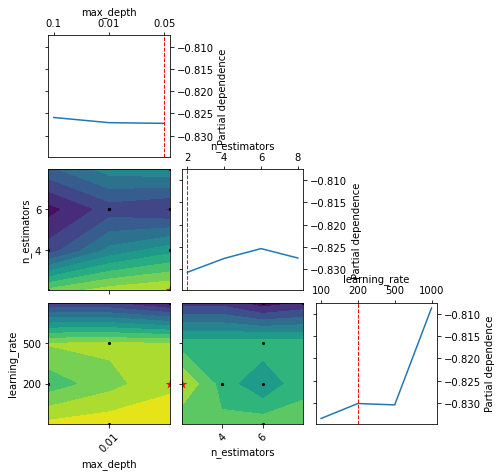

In [52]:
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram
_ = plot_objective(model_bayes_search.optimizer_results_[0],
                   dimensions=["max_depth", "n_estimators", "learning_rate"],
                   n_minimum_search=int(1e8))
plt.show()

In [53]:
model_bayes_search.optimizer_results_

[          fun: -0.8421980075141381
     func_vals: array([-0.84219801, -0.82436425, -0.80734546, -0.83757939, -0.83371491,
        -0.8312214 , -0.80432705, -0.82593791, -0.83541088, -0.84219801])
        models: [GaussianProcessRegressor(kernel=1**2 * HammingKernel(0, 0, 0) + WhiteKernel(noise_level=1),
                          n_restarts_optimizer=2, noise='gaussian',
                          normalize_y=True, random_state=67434008)]
  random_state: RandomState(MT19937) at 0x7F4B02D88540
         space: Space([Categorical(categories=(0.1, 0.01, 0.05), prior=None),
        Categorical(categories=(2, 4, 6, 8), prior=None),
        Categorical(categories=(100, 200, 500, 1000), prior=None)])
         specs: {'args': {'self': <skopt.optimizer.optimizer.Optimizer object at 0x7f4ab552ac40>, 'dimensions': [[0.1, 0.01, 0.05], [2, 4, 6, 8], [100, 200, 500, 1000]], 'base_estimator': 'gp', 'n_random_starts': None, 'n_initial_points': 10, 'initial_point_generator': 'random', 'n_jobs': 1, 'acq_

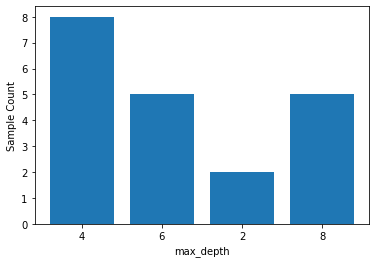

In [27]:
_ = plot_histogram(model_bayes_search.optimizer_results_[0], 1)
plt.show()

#### HyperOpt-Sklearn - Auto ML with bayesian

Need to remove NA

In [54]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df=df.dropna()
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

(7032, 20)
(7032,)


In [56]:
# HyperOpt-Sklearn 
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing

# HyperOpt: Optimizer
from hyperopt import tpe

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [57]:
# Need remove NAN value
model = HyperoptEstimator(classifier=any_classifier('cla'), 
                          preprocessing=any_preprocessing('pre'), 
                          algo=tpe.suggest, 
                          max_evals=10, 
                          trial_timeout=10)
# Training
model.fit(X_train, y_train)

 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 6/7 [00:00<?, ?trial/s, best loss=?]

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:49:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00,  1.93trial/s, best loss: 0.20111111111111113]


In [58]:
print( model.score( X_test, y_test ) )
# <<show score here>>
print( model.best_model() )

0.7953091684434968
{'learner': ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                     max_features=0.9200795166225546, min_samples_leaf=8,
                     n_estimators=51, n_jobs=1, random_state=0, verbose=False), 'preprocs': (PCA(n_components=45),), 'ex_preprocs': ()}


In [62]:
y_pred=model.predict(X_test)
#y_pred_probs=model.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y_test,y_pred))
print('f1 macro score:',metrics.f1_score(y_test,y_pred,average="macro")) # good for imbalance dataset
print('precision macro score:',metrics.precision_score(y_test,y_pred,average="macro"))
print('recall macro score:',metrics.recall_score(y_test,y_pred,average="macro"))
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:,1])
#print("AUC:",metrics.auc(fpr, tpr))
print("MCC:",metrics.matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[945  88]
 [200 174]]
Balanced Accuracy score: 0.690025935570039
f1 macro score: 0.7074692031810385
precision macro score: 0.7447248241608053
recall macro score: 0.690025935570039
MCC: 0.431296017456087
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.47      0.55       374

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



#### Py caret

In [63]:
from pycaret.classification import *

In [64]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [72]:
#data, data_unseen = model_selection.train_test_split(df, test_size=0.2,random_state=786)

data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5634, 21)
Unseen Data For Predictions: (1409, 21)


In [73]:
print(data["Churn"].value_counts(normalize=True))
print(data_unseen["Churn"].value_counts(normalize=True))

No     0.730032
Yes    0.269968
Name: Churn, dtype: float64
No     0.753016
Yes    0.246984
Name: Churn, dtype: float64


In [74]:
data= data.drop(["customerID"],axis=1)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)
data.shape

(5634, 20)

In [75]:
data_unseen= data_unseen.drop(["customerID"],axis=1)
data_unseen['TotalCharges'] = data_unseen['TotalCharges'].replace(' ', np.nan).astype(float)
data_unseen.shape

(1409, 20)

In [77]:
exp_clf101 = setup(data = data, target = 'Churn', session_id=123)

In [78]:
best_model = compare_models(fold=5,sort="AUC")

In [83]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


In [84]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True

In [85]:
ada = create_model('ada',fold=5)

In [82]:
tuned_ada = tune_model(ada,fold=5)

In [86]:
lightgbm = create_model('lightgbm')

In [87]:
tuned_lightgbm = tune_model(lightgbm,fold=5)

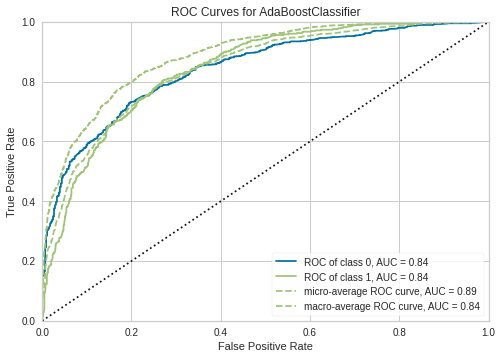

In [98]:
plot_model(tuned_lightgbm, plot = 'auc')

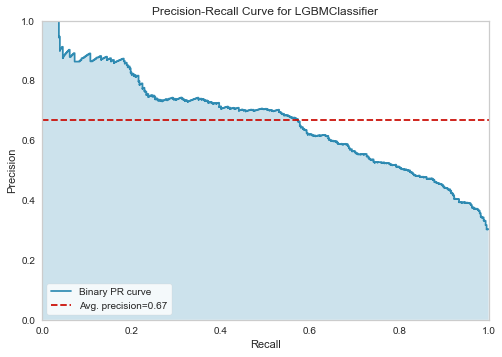

In [35]:
plot_model(tuned_lightgbm, plot = 'pr')

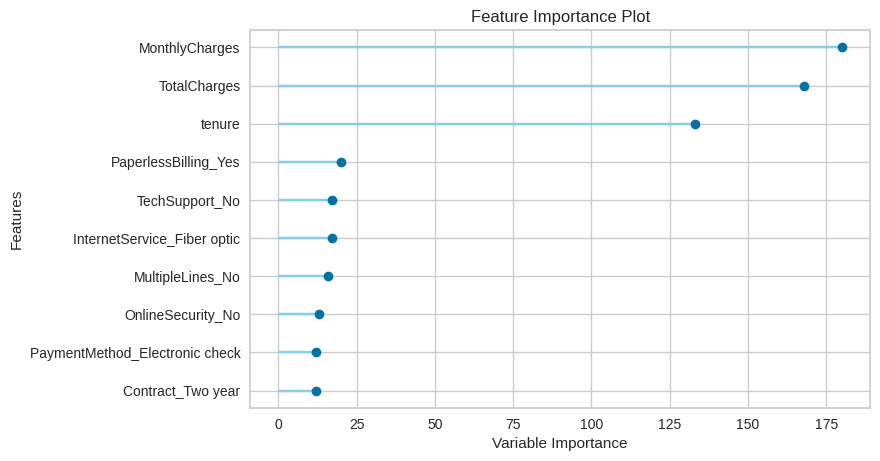

In [89]:
plot_model(tuned_lightgbm, plot='feature')

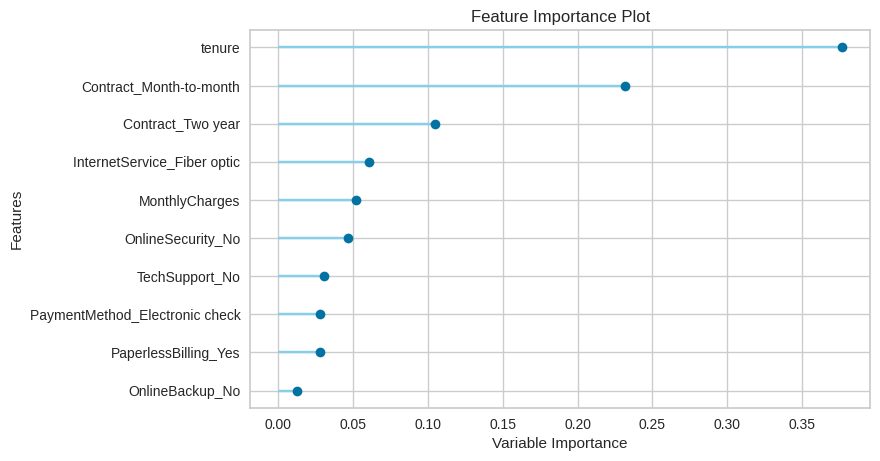

In [90]:
plot_model(tuned_ada, plot='feature')

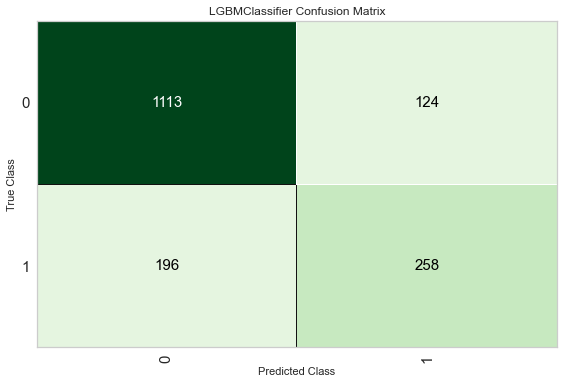

In [37]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [107]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param‚Ä¶

In [101]:
predict_model(tuned_lightgbm) 
# 30% data separate for test/hold-out sample from data 5634 rows --> 1691 rows

tenure  MonthlyCharges  TotalCharges  gender_Female  SeniorCitizen_0  \
0       41.0       24.850000    962.250000            1.0              1.0   
1        9.0       20.350000    191.100006            1.0              1.0   
2       69.0       84.900002   5785.649902            0.0              0.0   
3       42.0       19.350000    867.299988            0.0              1.0   
4       24.0       89.849998   2165.050049            0.0              1.0   
...      ...             ...           ...            ...              ...   
1686     3.0       20.000000     49.650002            0.0              1.0   
1687    13.0       94.099998   1215.599976            1.0              1.0   
1688    29.0       89.199997   2698.350098            0.0              1.0   
1689    31.0       79.199997   2497.199951            1.0              1.0   
1690    18.0       95.949997   1745.500000            1.0              1.0   

      Partner_No  Dependents_No  MultipleLines_No  MultipleLines_Yes  \
0            1.0            1.0               0.0                1.0   
1            0.0            0.0               1.0                0.0   
2            0.0            1.0               0.0                1.0   
3            0.0            0.0               1.0                0.0   
4            1.0            1.0               0.0                1.0   
...          ...            ...               ...                ...   
1686         0.0            1.0               1.0                0.0   
1687         0.0            1.0               0.0                1.0   
1688         0.0            0.0               0.0                1.0   
1689         1.0            1.0               1.0                0.0   
1690         0.0            1.0               1.0                0.0   

      InternetService_DSL  ...  Contract_One year  Contract_Two year  \
0                     0.0  ...                1.0                0.0   
1                     0.0  ...                0.0                1.0   
2                     0.0  ...                0.0                0.0   
3                     0.0  ...                0.0                1.0   
4                     0.0  ...                0.0                0.0   
...                   ...  ...                ...                ...   
1686                  0.0  ...                0.0                0.0   
1687                  0.0  ...                0.0                0.0   
1688                  0.0  ...                0.0                0.0   
1689                  1.0  ...                0.0                1.0   
1690                  0.0  ...                0.0                0.0   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                      1.0                                      0.0   
1                      0.0                                      0.0   
2                      1.0                                      0.0   
3                      0.0                                      0.0   
4                      1.0                                      0.0   
...                    ...                                      ...   
1686                   0.0                                      1.0   
1687                   0.0                                      0.0   
1688                   1.0                                      0.0   
1689                   0.0                                      0.0   
1690                   1.0                                      0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       1.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   
...         

Transformed Train Set	(3943, 31)
	Transformed Test Set	(1691, 31)

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [103]:
final_model = finalize_model(tuned_lightgbm)

In [104]:
#Final Random Forest model parameters for deployment
print(final_model)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [105]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0      No         No       2          Yes   
1  Female              0      No         No       8          Yes   
2  Female              0      No         No      10           No   
3  Female              0     Yes         No      28          Yes   
4    Male              0      No         No      16          Yes   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0                No     Fiber optic                   No                   No   
1               Yes     Fiber optic                   No                   No   
2  No phone service             DSL                  Yes                   No   
3               Yes     Fiber optic                   No                   No   
4                No              No  No internet service  No internet service   

   ...          StreamingTV      StreamingMovies        Contract  \
0  ...                   No                   No  Month-to-month   
1  ...                  Yes                  Yes  Month-to-month   
2  ...                   No                   No  Month-to-month   
3  ...                  Yes                  Yes  Month-to-month   
4  ...  No internet service  No internet service        Two year   

  PaperlessBilling            PaymentMethod MonthlyCharges TotalCharges  \
0              Yes         Electronic check          70.70       151.65   
1              Yes         Electronic check          99.65       820.50   
2               No             Mailed check          29.75       301.90   
3              Yes         Electronic check         104.80      3046.05   
4               No  Credit card (automatic)          18.95       326.80   

   Churn  Label   Score  
0    Yes    Yes  0.6468  
1    Yes    Yes  0.8604  
2     No     No  0.8429  
3    Yes    Yes  0.5418  
4     No     No  0.9758  

[5 rows x 22 columns]

In [106]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Churn'], unseen_predictions['Label'], metric = 'AUC')

0.7297

#### Pycaret 2

In [85]:
from pycaret.classification import *

In [86]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [87]:
#data, data_unseen = model_selection.train_test_split(df, test_size=0.2,random_state=786)

data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5634, 21)
Unseen Data For Predictions: (1409, 21)


In [88]:
print(data["Churn"].value_counts(normalize=True))
print(data_unseen["Churn"].value_counts(normalize=True))

No     0.730032
Yes    0.269968
Name: Churn, dtype: float64
No     0.753016
Yes    0.246984
Name: Churn, dtype: float64


In [89]:
data= data.drop(["customerID"],axis=1)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)
data.shape

(5634, 20)

In [90]:
data_unseen= data_unseen.drop(["customerID"],axis=1)
data_unseen['TotalCharges'] = data_unseen['TotalCharges'].replace(' ', np.nan).astype(float)
data_unseen.shape

(1409, 20)

In [92]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0     Yes        Yes      47          Yes   
1    Male              0     Yes         No       3           No   
2  Female              1      No         No       4          Yes   
3    Male              0     Yes        Yes      72          Yes   
4  Female              0      No         No      45          Yes   

      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0               Yes             DSL                   No                  Yes   
1  No phone service             DSL                   No                   No   
2               Yes     Fiber optic                   No                   No   
3                No              No  No internet service  No internet service   
4                No             DSL                  Yes                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1                   No                   No                   No   
2                  Yes                   No                   No   
3  No internet service  No internet service  No internet service   
4                  Yes                  Yes                  Yes   

       StreamingMovies        Contract PaperlessBilling  \
0                   No  Month-to-month               No   
1                   No  Month-to-month               No   
2                  Yes  Month-to-month              Yes   
3  No internet service        Two year              Yes   
4                  Yes        Two year               No   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           54.25       2538.20    No  
1               Mailed check           25.00         78.25    No  
2           Electronic check           88.85        372.45   Yes  
3    Credit card (automatic)           19.80       1414.65    No  
4  Bank transfer (automatic)           81.65       3618.70    No

In [93]:
exp_clf102 = setup(data = data, target = 'Churn', session_id=123,data_split_stratify=True,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['MonthlyCharges', 'TotalCharges'],
                  #group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                  #                 ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                  #log_experiment = True, experiment_name = 'credit1'
                  )

In [94]:
top3 = compare_models(n_select = 3,fold=5,sort="AUC")

In [95]:
print(top3)

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                     

In [100]:
tuned_ada = tune_model(ada,optimize="AUC",fold=5)

 Ensemble a Model

In [96]:
# lets create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

In [97]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

In [99]:
bagged_dt2 = ensemble_model(dt, n_estimators=100)


Blending is another common technique for ensembling that can be used in PyCaret. It uses predictions from multiple models to generate a final set of predictions using voting / majority consensus from all of the models passed in the estimator_list parameter. The method parameter can be used to define the type of voting. When set to hard, it uses labels for majority rule voting. When set to soft it uses the sum of predicted probabilities instead of the label. Default value of method is set to auto which means it tries to use soft method and fall back to hard if the former is not supported. Let's see an example below:

In [101]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

In [102]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

In [103]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

In [104]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of stack_models() is based on Wolpert, D. H. (1992b). Stacked generalization (Read More).

Let's see an example below using the top 3 models we have obtained from compare_models:

In [105]:
stack_soft = stack_models(top3)

In [106]:
stack_soft

StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x1692F3C5640, shuffle=False),
                   estimators=[('ada',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=123)),
                               ('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_rat...
                                                           validation_fraction=0.1,
               

In [107]:
xgboost = create_model('xgboost')
stack_soft2 = stack_models(top3, meta_model=xgboost)

10.0 Model Calibration

When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the calibrate_model() function. See an example below:

In [108]:
lightgbm = create_model('lightgbm')

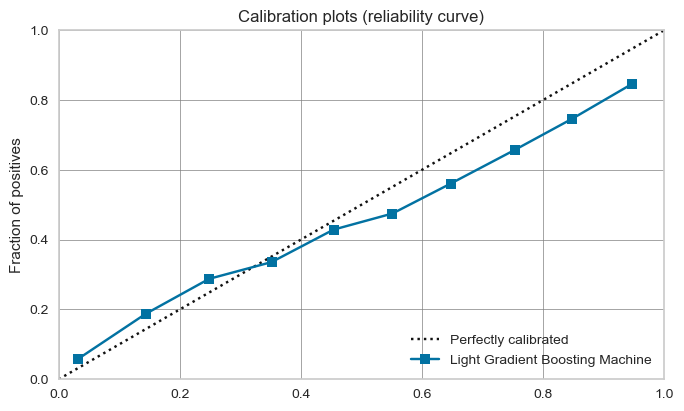

In [109]:
plot_model(lightgbm, plot='calibration')

In [110]:
calibrated_rf = calibrate_model(lightgbm)

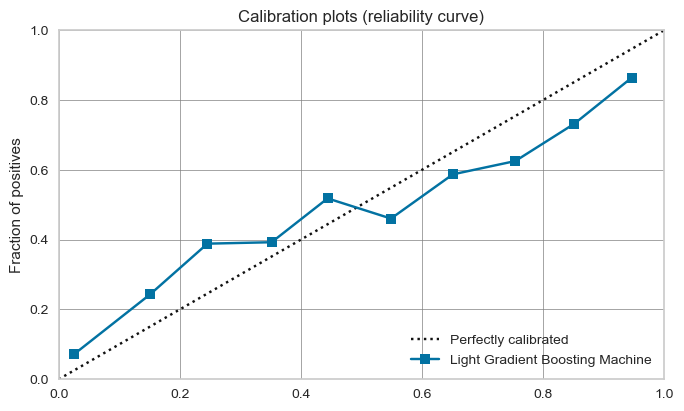

In [111]:
plot_model(calibrated_rf, plot='calibration')

In [113]:
calibrated_rf_isotonic = calibrate_model(lightgbm, method = 'isotonic')

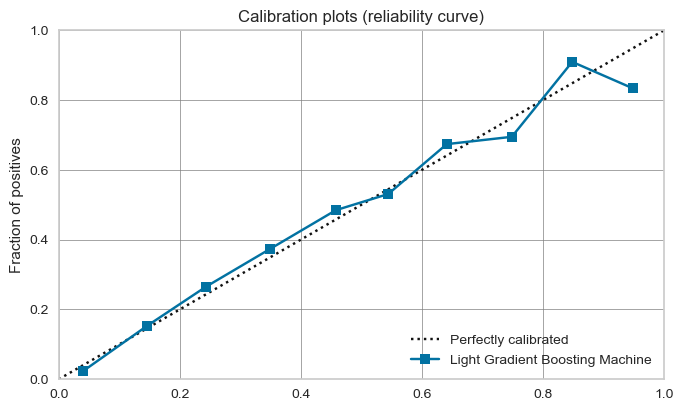

In [114]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [116]:
pycaret.__version__

'2.3.0'

In [115]:

# to start the MLFlow server from notebook:
!mlflow ui

'mlflow' is not recognized as an internal or external command,
operable program or batch file.


### Xgboost

#### Base model with explaination

In [ ]:
# Xgboost bat buoc phai dung onehot encoder or label / ordinal encoder, khong dung duoc cho category
model=XGBClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:27:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[891 144]
 [182 192]]
Balanced Accuracy score: 0.6871192745873054
macro f1 score: 0.6930980570328995
              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1035
         Yes       0.57      0.51      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

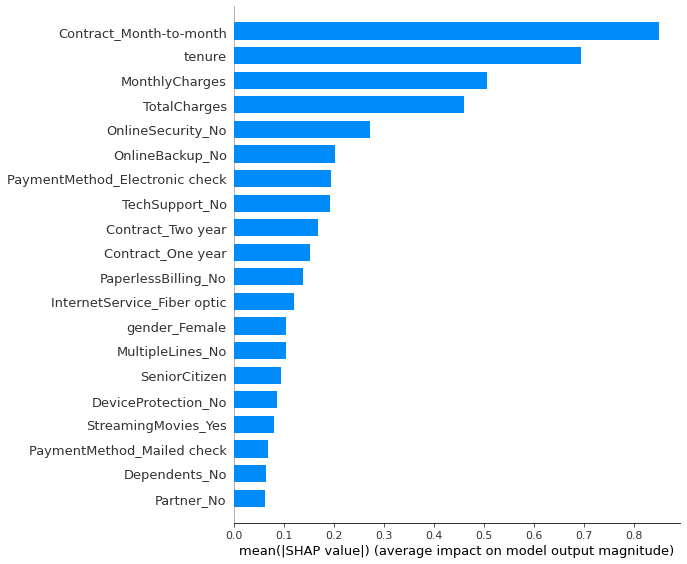

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

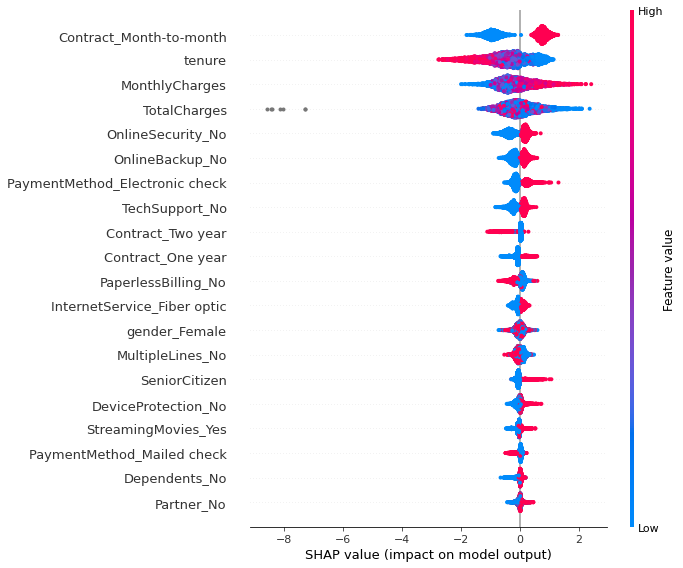

In [ ]:
shap.summary_plot(shap_values, X_train)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


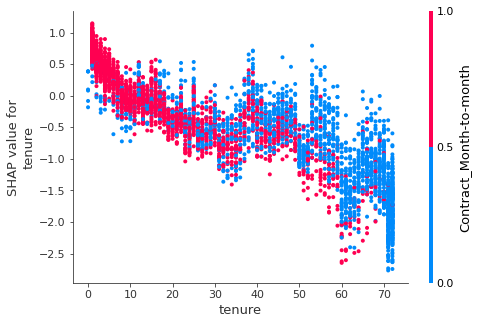

In [ ]:
shap.dependence_plot(1, shap_values, X_train)

In [ ]:
'''
for name in X_train.columns:
    print(name)
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)
'''

#### Grid search

In [ ]:
parameters = {
    'max_depth': [2,5], #range (2, 10, 1),
    'n_estimators': [100,500], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [ ]:
grid_search = model_selection.GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = scoring,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[08:37:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<AxesSubplot:ylabel='params'>

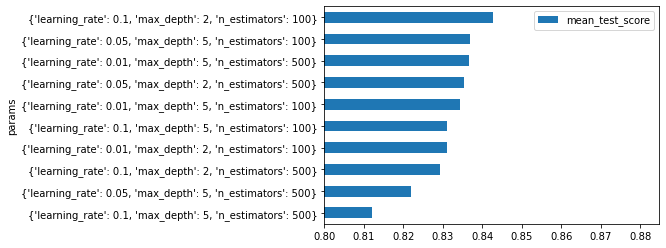

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [ ]:
predictions=grid_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[939  96]
 [189 185]]
Balanced Accuracy score: 0.7009493916143532
macro f1 score: 0.7165620268710761
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1035
         Yes       0.66      0.49      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



From analyticsvidhya

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
model= XGBClassifier(
             learning_rate =0.1,
             n_estimators=1000,
             max_depth=5,
             min_child_weight=1,
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
model.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:11:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[892 143]
 [194 180]]
Balanced Accuracy score: 0.6715595856260818
macro f1 score: 0.6788059826683632
              precision    recall  f1-score   support

          No       0.82      0.86      0.84      1035
         Yes       0.56      0.48      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



Step 2: Tune max_depth and min_child_weight

In [ ]:
param_test2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch2 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test2, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch2.fit(X_train,y_train)



In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.836791915545264)

Step 3: Tune gamma

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
             min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch3 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test3, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch3.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:19:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.1}, 0.8369726639959525)

Here, we can see the improvement in score. So the final parameters are:

    max_depth: 3
    min_child_weight: 1
    gamma: 0.1


Step 4: Tune subsample and colsample_bytree

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
             min_child_weight=1, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch4 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test4, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch4.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:21:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.6}, 0.8380368882347774)

Step 5: Tuning Regularization Parameters

Next step is to apply regularization to reduce overfitting. Though many people don‚Äôt use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it. I‚Äôll tune ‚Äòreg_alpha‚Äô value here and leave it upto you to try different values of ‚Äòreg_lambda‚Äô.

In [ ]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
             min_child_weight=1, gamma=0.1, subsample=0.6, colsample_bytree=0.7,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

gsearch5 = model_selection.GridSearchCV(estimator =  estimator,param_grid = param_test5, 
                                        scoring='roc_auc',n_jobs=4,cv=5)

gsearch5.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:23:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.6,
                                     tree_metho

In [ ]:
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 1}, 0.8380562133856895)

Step 6: Reducing Learning Rate

Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.

In [ ]:

model = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=3,
             min_child_weight=1, gamma=0.1, subsample=0.6, colsample_bytree=0.7,reg_alpha=0.838,
             objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

model.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:25:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0.838, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[933 102]
 [175 199]]
Balanced Accuracy score: 0.7167674184298225
macro f1 score: 0.7301857900831303
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



#### Random search

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [100,500], #range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
scoring = 'roc_auc' # balanced_accuracy,f1_macro,neg_log_loss, roc_auc,neg_root_mean_squared_error,

In [ ]:
random_search = model_selection.RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = scoring,
    n_jobs = 10,
    cv = 5,
    verbose=True
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:47:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           nthread=4, num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
               

<AxesSubplot:ylabel='params'>

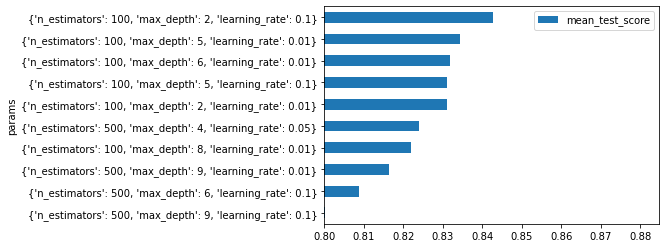

In [ ]:
results = pd.DataFrame(random_search.cv_results_)
#results.sort_values('rank_test_score', ascending=True).head(5) # print detail top 5
results.loc[:,'params'] = results.loc[:,'params'].astype(str)
(
results.sort_values('rank_test_score', ascending=False)
.loc[:,['params','mean_test_score']]
.drop_duplicates()
.head(10)
.plot.barh(x='params', xlim=(0.8))
)

In [ ]:
predictions=random_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[929 106]
 [179 195]]
Balanced Accuracy score: 0.7094874576971764
macro f1 score: 0.7223933219266864
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### Random forest, LR, all method

Drop na for random forest and logistic regression

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df=df.dropna()
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7032, 20)
(7032,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert total charge object to numeric
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [ ]:
# Random forest khong dung duoc neu con Nan value
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[926 107]
 [192 182]]
Balanced Accuracy score: 0.6915246077309741
macro f1 score: 0.7050072469713129
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# LogisticRegression khong dung duoc neu con Nan value
model=LogisticRegression(C=1,max_iter=100000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[923 110]
 [171 203]]
Balanced Accuracy score: 0.7181473927245807
macro f1 score: 0.7294321501674252
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1033
         Yes       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    #'NB':GaussianNB(),
    #'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    "Catboost": CatBoostClassifier()
    
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

Names  test_acc  test_rec_macro  test_prec_macro  test_f1_macro  \
0        LR  0.718733        0.718733         0.746618       0.729881   
1       LDA  0.718291        0.718291         0.738066       0.726423   
6  Catboost  0.712539        0.712539         0.743321       0.724575   
5      LGBM  0.703956        0.703956         0.735745       0.716088   
4       XGB  0.694536        0.694536         0.714540       0.702745   
3        RF  0.687679        0.687679         0.724059       0.700615   
2      CART  0.661094        0.661094         0.658394       0.659208   

   train_acc  train_rec_macro  train_prec_macro  train_f1_macro  fit_time  \
0   0.726077         0.726077          0.756210        0.738138  0.193045   
1   0.723666         0.723666          0.744088        0.732357  0.073542   
6   0.843666         0.843666          0.879059        0.858981  4.667421   
5   0.883058         0.883058          0.902557        0.892060  0.130142   
4   0.955259         0.955259          0.962970        0.959023  0.675639   
3   0.996849         0.996849          0.997315        0.997081  0.398060   
2   0.995953         0.995953          0.998356        0.997146  0.027064   

        time  
0   1.842925  
1   1.221627  
6  23.969369  
5   1.278439  
4   3.982846  
3   2.923115  
2   0.687225

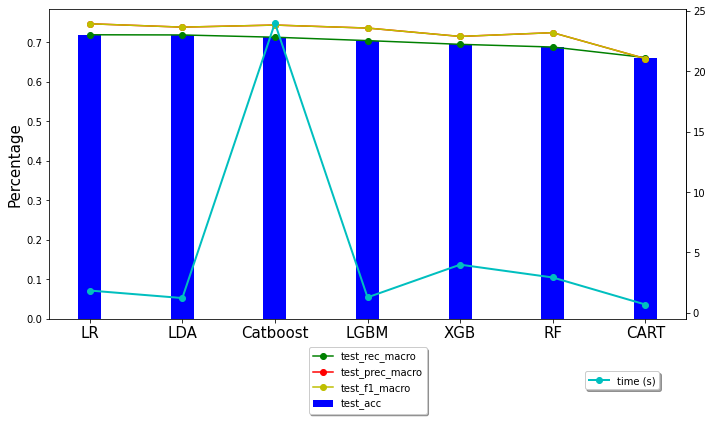

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

## No convert

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)

In [ ]:
'''
# evaluate the model
model = LGBMClassifier()
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
'''

"\n# evaluate the model\nmodel = LGBMClassifier()\ncv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)\nn_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')\n# report performance\nprint('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))\n"

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges

## Convert to category (factor) only

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=X_train.astype("category")
X_test=X_test.astype("category")

In [ ]:
# evaluate the model
#model = LGBMClassifier()
#cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
#n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
#from matplotlib import pyplot
# plot model performance for comparison
#pyplot.boxplot(n_scores, showmeans=True)
#pyplot.show()

### Lightgbm

In [ ]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=LGBMClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[900 135]
 [170 204]]
Balanced Accuracy score: 0.7075098814229248
macro f1 score: 0.7136684511931453
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1035
         Yes       0.60      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
imp_vals= model.feature_importances_
varimp_grid_df=pd.DataFrame({'feature': X_train.columns, 'importance': imp_vals})
varimp_grid_df=varimp_grid_df.sort_values(by='importance',ascending=False)
varimp_grid_df.head(10)

feature  importance
4             tenure         367
6      MultipleLines         222
0             gender         215
14          Contract         196
7    InternetService         194
9       OnlineBackup         192
8     OnlineSecurity         178
13   StreamingMovies         167
15  PaperlessBilling         166
2            Partner         165

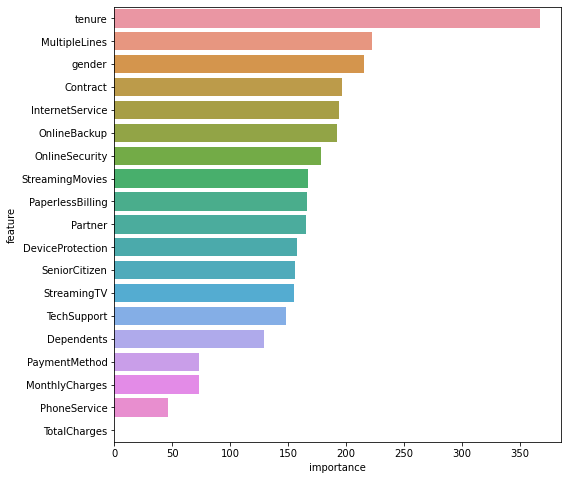

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x='importance',y='feature',data=varimp_grid_df,ax=ax)
plt.show()

In [ ]:
#!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


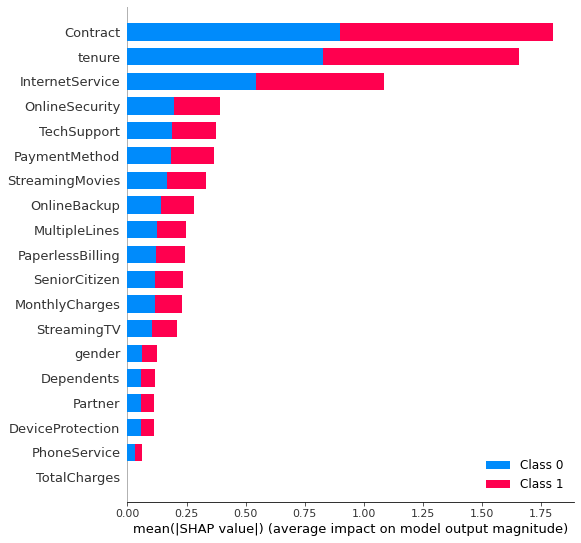

In [ ]:
shap.summary_plot(shap_values, X_train)

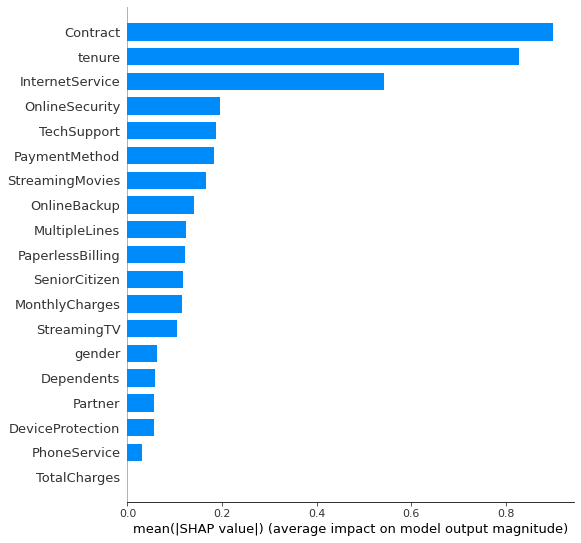

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

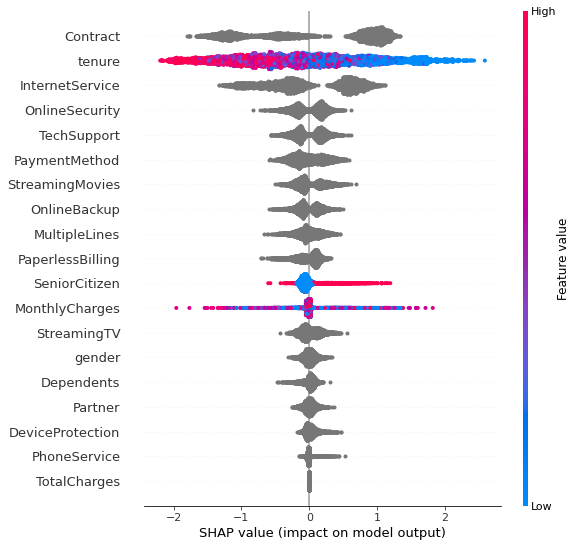

In [ ]:
shap.summary_plot(shap_values[1], X_train)

In [ ]:
#for name in X_train.columns:
#    shap.dependence_plot(name, shap_values[1], X_train, display_features=X_train)

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_test.iloc[:100,:])

Other light gbm

In [ ]:
import lightgbm as lgb

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_val=X_val.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=X_train.astype("category")
X_val=X_val.astype("category")
X_test=X_test.astype("category")
# label encoder y train, y test
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
# Model
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
model_2 = lgb.train(params, d_train, 10000, valid_sets=[d_val], 
                    early_stopping_rounds=50, verbose_eval=1000)
predictions=(model_2.predict(X_test)>=0.5).astype(int) # convert propability to True/False and 1/0

print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

(7043, 20)
(7043,)


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.417106
[[932 103]
 [192 182]]
Balanced Accuracy score: 0.6935570539151101
macro f1 score: 0.7078573582301142
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Prediction b·∫±ng binary_logloss: array([0.21159053, 0.04097542, 0.07211375, ..., 0.23537171, 0.22034149,
       0.46425456])
  

In [ ]:
# Xgboost bat buoc phai dung onehot encoder or label / ordinal encoder, khong dung duoc cho category
'''
model=XGBClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))
'''

'\nmodel=XGBClassifier()\nmodel.fit(X_train,y_train)\npredictions=model.predict(X_test)\nprint(confusion_matrix(y_test,predictions))\nprint(\'Balanced Accuracy score:\',balanced_accuracy_score(y_test,predictions))\nprint(\'macro f1 score:\',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset\nprint(classification_report(y_test,predictions))\n'

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

# 3.2 Model with Worflow

In [121]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [162]:
X = df.drop(["customerID",'Churn'],axis=1)
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 19)
(7043,)


In [163]:
X_train.dtypes
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [164]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [165]:
X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
731     Male              0      No         No       5          Yes   
5546    Male              0      No         No       4           No   
3023    Male              0     Yes        Yes      72          Yes   
3914    Male              0      No         No      39          Yes   
4787  Female              0     Yes         No       4          Yes   

         MultipleLines InternetService       OnlineSecurity  \
731                 No              No  No internet service   
5546  No phone service             DSL                  Yes   
3023               Yes             DSL                  Yes   
3914                No              No  No internet service   
4787                No             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
731   No internet service  No internet service  No internet service   
5546                  Yes                   No                  Yes   
3023                  Yes                  Yes                  Yes   
3914  No internet service  No internet service  No internet service   
4787                  Yes                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
731   No internet service  No internet service  Month-to-month   
5546                   No                   No  Month-to-month   
3023                  Yes                  Yes        Two year   
3914  No internet service  No internet service        One year   
4787                   No                   No  Month-to-month   

     PaperlessBilling            PaymentMethod  MonthlyCharges TotalCharges  
731                No             Mailed check           20.35        92.75  
5546               No             Mailed check           42.40        146.4  
3023               No  Credit card (automatic)           89.70       6339.3  
3914               No             Mailed check           19.90       791.15  
4787               No             Mailed check           54.70       235.05

- Replace '' in Total charges column
- Convert to category or ordinal encoder or one hot encoder
- No need to remove NA value for tree method


In [166]:
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)

In [167]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [168]:
def to_category(x):
  return x.astype("category")

to_category_transform = preprocessing.FunctionTransformer(to_category)

In [169]:
X_train_a = to_category_transform.fit_transform(X_train)
X_train_a["gender"]

731       Male
5546      Male
3023      Male
3914      Male
4787    Female
         ...  
913       Male
3170      Male
1222      Male
5109      Male
6524      Male
Name: gender, Length: 4507, dtype: category
Categories (2, object): [Female, Male]

In [170]:
X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
731     Male              0      No         No       5          Yes   
5546    Male              0      No         No       4           No   
3023    Male              0     Yes        Yes      72          Yes   
3914    Male              0      No         No      39          Yes   
4787  Female              0     Yes         No       4          Yes   

         MultipleLines InternetService       OnlineSecurity  \
731                 No              No  No internet service   
5546  No phone service             DSL                  Yes   
3023               Yes             DSL                  Yes   
3914                No              No  No internet service   
4787                No             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
731   No internet service  No internet service  No internet service   
5546                  Yes                   No                  Yes   
3023                  Yes                  Yes                  Yes   
3914  No internet service  No internet service  No internet service   
4787                  Yes                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
731   No internet service  No internet service  Month-to-month   
5546                   No                   No  Month-to-month   
3023                  Yes                  Yes        Two year   
3914  No internet service  No internet service        One year   
4787                   No                   No  Month-to-month   

     PaperlessBilling            PaymentMethod  MonthlyCharges  TotalCharges  
731                No             Mailed check           20.35         92.75  
5546               No             Mailed check           42.40        146.40  
3023               No  Credit card (automatic)           89.70       6339.30  
3914               No             Mailed check           19.90        791.15  
4787               No             Mailed check           54.70        235.05

In [197]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector,ColumnTransformer

In [198]:
# Define categorical columns
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns are: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [200]:
# Define categorical pipeline
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])
preprocessor.fit(X_train)

# Prepare column names
cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(categorical)
columns = np.append(cat_columns, numerical)

# Inspect training data before and after
print("******************** Training data ********************")
display(X_train.head())
X_train_tran= pd.DataFrame(preprocessor.transform(X_train), columns=columns)
display(X_train_tran.head())

# Inspect test data before and after
print("******************** Test data ********************")
display(X_test.head())
X_test_tran= pd.DataFrame(preprocessor.transform(X_test), columns=columns)
display(X_test_tran.head())

******************** Training data ********************


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
731     Male              0      No         No       5          Yes   
5546    Male              0      No         No       4           No   
3023    Male              0     Yes        Yes      72          Yes   
3914    Male              0      No         No      39          Yes   
4787  Female              0     Yes         No       4          Yes   

         MultipleLines InternetService       OnlineSecurity  \
731                 No              No  No internet service   
5546  No phone service             DSL                  Yes   
3023               Yes             DSL                  Yes   
3914                No              No  No internet service   
4787                No             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
731   No internet service  No internet service  No internet service   
5546                  Yes                   No                  Yes   
3023                  Yes                  Yes                  Yes   
3914  No internet service  No internet service  No internet service   
4787                  Yes                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
731   No internet service  No internet service  Month-to-month   
5546                   No                   No  Month-to-month   
3023                  Yes                  Yes        Two year   
3914  No internet service  No internet service        One year   
4787                   No                   No  Month-to-month   

     PaperlessBilling            PaymentMethod  MonthlyCharges  TotalCharges  
731                No             Mailed check           20.35         92.75  
5546               No             Mailed check           42.40        146.40  
3023               No  Credit card (automatic)           89.70       6339.30  
3914               No             Mailed check           19.90        791.15  
4787               No             Mailed check           54.70        235.05

gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0            0.0          1.0         1.0          0.0            1.0   
1            0.0          1.0         1.0          0.0            1.0   
2            0.0          1.0         0.0          1.0            0.0   
3            0.0          1.0         1.0          0.0            1.0   
4            1.0          0.0         0.0          1.0            1.0   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0             0.0              0.0               1.0               1.0   
1             0.0              1.0               0.0               0.0   
2             1.0              0.0               1.0               0.0   
3             0.0              0.0               1.0               1.0   
4             0.0              0.0               1.0               1.0   

   MultipleLines_No phone service  ...  PaperlessBilling_No  \
0                             0.0  ...                  1.0   
1                             1.0  ...                  1.0   
2                             0.0  ...                  1.0   
3                             0.0  ...                  1.0   
4                             0.0  ...                  1.0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                   0.0                                      0.0   
1                   0.0                                      0.0   
2                   0.0                                      0.0   
3                   0.0                                      0.0   
4                   0.0                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    1.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   

   PaymentMethod_Mailed check  SeniorCitizen    tenure  MonthlyCharges  \
0                         1.0       -0.42989 -1.125070       -1.481784   
1                         1.0       -0.42989 -1.165697       -0.742942   
2                         0.0       -0.42989  1.596935        0.841966   
3                         1.0       -0.42989  0.256246       -1.496863   
4                         1.0       -0.42989 -1.165697       -0.330799   

   TotalCharges  
0     -0.972257  
1     -0.948484  
2      1.795685  
3     -0.662785  
4     -0.909202  

[5 rows x 45 columns]

******************** Test data ********************


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
3379  Female              0      No         No       2          Yes   
5492  Female              0     Yes        Yes      65          Yes   
4295    Male              1     Yes         No      67          Yes   
2995  Female              0      No         No       1           No   
3141    Male              1      No         No       2          Yes   

         MultipleLines InternetService       OnlineSecurity  \
3379                No              No  No internet service   
5492               Yes              No  No internet service   
4295                No             DSL                  Yes   
2995  No phone service             DSL                   No   
3141                No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
3379  No internet service  No internet service  No internet service   
5492  No internet service  No internet service  No internet service   
4295                  Yes                   No                  Yes   
2995                   No                   No                   No   
3141                  Yes                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
3379  No internet service  No internet service  Month-to-month   
5492  No internet service  No internet service        Two year   
4295                   No                   No        One year   
2995                   No                   No  Month-to-month   
3141                   No                  Yes  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
3379               No               Mailed check           19.30         44.40  
5492              Yes  Bank transfer (automatic)           25.30       1748.55  
4295              Yes  Bank transfer (automatic)           60.95       4119.40  
2995               No  Bank transfer (automatic)           25.25         25.25  
3141              Yes    Credit card (automatic)           95.10        180.25

gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0            1.0          0.0         1.0          0.0            1.0   
1            1.0          0.0         0.0          1.0            0.0   
2            0.0          1.0         0.0          1.0            1.0   
3            1.0          0.0         1.0          0.0            1.0   
4            0.0          1.0         1.0          0.0            1.0   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0             0.0              0.0               1.0               1.0   
1             1.0              0.0               1.0               0.0   
2             0.0              0.0               1.0               1.0   
3             0.0              1.0               0.0               0.0   
4             0.0              0.0               1.0               1.0   

   MultipleLines_No phone service  ...  PaperlessBilling_No  \
0                             0.0  ...                  1.0   
1                             0.0  ...                  0.0   
2                             0.0  ...                  0.0   
3                             1.0  ...                  1.0   
4                             0.0  ...                  0.0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                   0.0                                      0.0   
1                   1.0                                      1.0   
2                   1.0                                      1.0   
3                   0.0                                      1.0   
4                   1.0                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    1.0                             0.0   

   PaymentMethod_Mailed check  SeniorCitizen    tenure  MonthlyCharges  \
0                         1.0      -0.429890 -1.246951       -1.516967   
1                         0.0      -0.429890  1.312547       -1.315922   
2                         0.0       2.326176  1.393801       -0.121377   
3                         0.0      -0.429890 -1.287578       -1.317597   
4                         0.0       2.326176 -1.246951        1.022907   

   TotalCharges  
0     -0.993681  
1     -0.238547  
2      0.812013  
3     -1.002167  
4     -0.933484  

[5 rows x 45 columns]

In [ ]:
# Define categorical columns
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

In [204]:
def to_category1(x):
  return pd.DataFrame(x).astype("category")


to_category_transform1 = preprocessing.FunctionTransformer(to_category1)
to_category_transform2 = preprocessing.FunctionTransformer(lambda x: x.astype("category"))

In [208]:
# Define categorical pipeline
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', to_category_transform1)])

# Define numerical pipeline
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])
preprocessor.fit(X_train)

# Prepare column names
#cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(categorical)
columns = np.append(categorical, numerical)

# Inspect training data before and after
print("******************** Training data ********************")
display(X_train.head())
X_train_tran= pd.DataFrame(preprocessor.transform(X_train), columns=columns)
display(X_train_tran.head())

# Inspect test data before and after
print("******************** Test data ********************")
display(X_test.head())
X_test_tran= pd.DataFrame(preprocessor.transform(X_test), columns=columns)
display(X_test_tran.head())

******************** Training data ********************


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
731     Male              0      No         No       5          Yes   
5546    Male              0      No         No       4           No   
3023    Male              0     Yes        Yes      72          Yes   
3914    Male              0      No         No      39          Yes   
4787  Female              0     Yes         No       4          Yes   

         MultipleLines InternetService       OnlineSecurity  \
731                 No              No  No internet service   
5546  No phone service             DSL                  Yes   
3023               Yes             DSL                  Yes   
3914                No              No  No internet service   
4787                No             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
731   No internet service  No internet service  No internet service   
5546                  Yes                   No                  Yes   
3023                  Yes                  Yes                  Yes   
3914  No internet service  No internet service  No internet service   
4787                  Yes                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
731   No internet service  No internet service  Month-to-month   
5546                   No                   No  Month-to-month   
3023                  Yes                  Yes        Two year   
3914  No internet service  No internet service        One year   
4787                   No                   No  Month-to-month   

     PaperlessBilling            PaymentMethod  MonthlyCharges  TotalCharges  
731                No             Mailed check           20.35         92.75  
5546               No             Mailed check           42.40        146.40  
3023               No  Credit card (automatic)           89.70       6339.30  
3914               No             Mailed check           19.90        791.15  
4787               No             Mailed check           54.70        235.05

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0    Male      No         No          Yes                No              No   
1    Male      No         No           No  No phone service             DSL   
2    Male     Yes        Yes          Yes               Yes             DSL   
3    Male      No         No          Yes                No              No   
4  Female     Yes         No          Yes                No             DSL   

        OnlineSecurity         OnlineBackup     DeviceProtection  \
0  No internet service  No internet service  No internet service   
1                  Yes                  Yes                   No   
2                  Yes                  Yes                  Yes   
3  No internet service  No internet service  No internet service   
4                  Yes                  Yes                   No   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                   No   
2                  Yes                  Yes                  Yes   
3  No internet service  No internet service  No internet service   
4                   No                   No                   No   

         Contract PaperlessBilling            PaymentMethod SeniorCitizen  \
0  Month-to-month               No             Mailed check      -0.42989   
1  Month-to-month               No             Mailed check      -0.42989   
2        Two year               No  Credit card (automatic)      -0.42989   
3        One year               No             Mailed check      -0.42989   
4  Month-to-month               No             Mailed check      -0.42989   

     tenure MonthlyCharges TotalCharges  
0  -1.12507       -1.48178    -0.972257  
1   -1.1657      -0.742942    -0.948484  
2   1.59694       0.841966      1.79568  
3  0.256246       -1.49686    -0.662785  
4   -1.1657      -0.330799    -0.909202

******************** Test data ********************


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
3379  Female              0      No         No       2          Yes   
5492  Female              0     Yes        Yes      65          Yes   
4295    Male              1     Yes         No      67          Yes   
2995  Female              0      No         No       1           No   
3141    Male              1      No         No       2          Yes   

         MultipleLines InternetService       OnlineSecurity  \
3379                No              No  No internet service   
5492               Yes              No  No internet service   
4295                No             DSL                  Yes   
2995  No phone service             DSL                   No   
3141                No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
3379  No internet service  No internet service  No internet service   
5492  No internet service  No internet service  No internet service   
4295                  Yes                   No                  Yes   
2995                   No                   No                   No   
3141                  Yes                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
3379  No internet service  No internet service  Month-to-month   
5492  No internet service  No internet service        Two year   
4295                   No                   No        One year   
2995                   No                   No  Month-to-month   
3141                   No                  Yes  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
3379               No               Mailed check           19.30         44.40  
5492              Yes  Bank transfer (automatic)           25.30       1748.55  
4295              Yes  Bank transfer (automatic)           60.95       4119.40  
2995               No  Bank transfer (automatic)           25.25         25.25  
3141              Yes    Credit card (automatic)           95.10        180.25

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female      No         No          Yes                No              No   
1  Female     Yes        Yes          Yes               Yes              No   
2    Male     Yes         No          Yes                No             DSL   
3  Female      No         No           No  No phone service             DSL   
4    Male      No         No          Yes                No     Fiber optic   

        OnlineSecurity         OnlineBackup     DeviceProtection  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                   No   
3                   No                   No                   No   
4                   No                  Yes                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2                  Yes                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                  Yes   

         Contract PaperlessBilling              PaymentMethod SeniorCitizen  \
0  Month-to-month               No               Mailed check      -0.42989   
1        Two year              Yes  Bank transfer (automatic)      -0.42989   
2        One year              Yes  Bank transfer (automatic)       2.32618   
3  Month-to-month               No  Bank transfer (automatic)      -0.42989   
4  Month-to-month              Yes    Credit card (automatic)       2.32618   

    tenure MonthlyCharges TotalCharges  
0 -1.24695       -1.51697    -0.993681  
1  1.31255       -1.31592    -0.238547  
2   1.3938      -0.121377     0.812013  
3 -1.28758        -1.3176     -1.00217  
4 -1.24695        1.02291    -0.933484

In [207]:
X_test_tran["gender"]

0       Female
1       Female
2         Male
3       Female
4         Male
         ...  
1404      Male
1405      Male
1406      Male
1407      Male
1408    Female
Name: gender, Length: 1409, dtype: object

In [210]:
X_test_tran.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
SeniorCitizen       object
tenure              object
MonthlyCharges      object
TotalCharges        object
dtype: object

# 4. Explain model

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,cross_validate
#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score
from sklearn.metrics import make_scorer

# explain
import shap
import dalex as dx

# OOP python for feature engineering
from sklearn.base import BaseEstimator, TransformerMixin

In [52]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [53]:
target="Churn"
X = df.drop(columns=target)
y= df[target]
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [54]:
# Drop columns features
class DropSomeColumns(BaseEstimator, TransformerMixin):

    def __init__(self, feature_name):
        self.feature_name = feature_name

    def fit(self, X: pd.DataFrame, y: pd.Series):
        # there is nothing to fit
        return self

    def transform(self, X:pd.DataFrame):
        X = X.copy() # creating a copy to avoid changes to original dataset
        X = X.drop(columns=self.feature_name)
        #X = X[self.feature_name]
        return X

In [55]:
# Remove "" in object column and convert to number
class Convert_to_number(BaseEstimator, TransformerMixin):

    def __init__(self, feature_name):
        self.feature_name = feature_name

    def fit(self, X: pd.DataFrame, y: pd.Series):
        # there is nothing to fit
        return self

    def transform(self, X:pd.DataFrame):
        X = X.copy() # creating a copy to avoid changes to original dataset
        X[self.feature_name] = X[self.feature_name].replace(' ', np.nan).astype(float)
        #X = X[self.feature_name]
        return X

In [56]:
pipe=pipeline.Pipeline(steps=[
                    ("DropSomeColumns",DropSomeColumns("customerID")),
                    ("Convert_to_number",Convert_to_number("TotalCharges"))
                    ]
             )

In [57]:
X_train=pipe.transform(X_train)
X_val=pipe.transform(X_val)
X_test=pipe.transform(X_test)

In [58]:
# Define categorical columns
categorical = list(X_train.select_dtypes('object').columns)
# Define numerical columns
numerical = list(X_train.select_dtypes('number').columns)

In [59]:
# Combine categorical and numerical pipelines
preprocessor = compose.ColumnTransformer(transformers=[
                                                ('cat', preprocessing.OneHotEncoder(), categorical),
                                                ('num', preprocessing.StandardScaler(), numerical)
                                                      ])

In [60]:
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges'])])

In [61]:
# Get column name
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names(categorical)
columns = np.append(cat_columns, numerical)

# transform x_train, val, test
X_train= pd.DataFrame(preprocessor.transform(X_train), columns=columns)
X_val= pd.DataFrame(preprocessor.transform(X_val), columns=columns)
X_test= pd.DataFrame(preprocessor.transform(X_test), columns=columns)

In [68]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=LGBMClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_probs=model.predict_proba(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print('Balanced Accuracy score:',metrics.balanced_accuracy_score(y_test,y_pred))
print('f1 macro score:',metrics.f1_score(y_test,y_pred,average="macro")) # good for imbalance dataset
print('precision macro score:',metrics.precision_score(y_test,y_pred,average="macro"))
print('recall macro score:',metrics.recall_score(y_test,y_pred,average="macro"))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:,1],pos_label='Yes') # convert label to yes/no
print("AUC:",metrics.auc(fpr, tpr))
print("MCC:",metrics.matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[904 131]
 [176 198]]
Balanced Accuracy score: 0.7014208581983519
f1 macro score: 0.7090732389724551
precision macro score: 0.719430372621862
recall macro score: 0.7014208581983519
AUC: 0.8346624815934279
MCC: 0.4204657130767243
              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1035
         Yes       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

